<a href="https://colab.research.google.com/github/elpinchepastel/convolutional-networks/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# Load files
#from google.colab import files
#foto = files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/My Drive/Fotos/'
elemento = 'Hijo.jpg'
#path = path + elemento

In [6]:
import os
path = os.path.join(path, elemento)

In [7]:
image = Image.open(path)
print(image.size)

(5184, 3456)


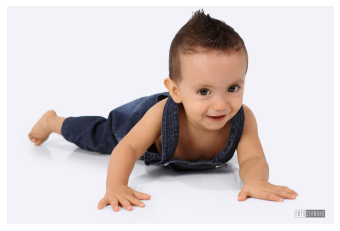

In [8]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
image_tensor = TF.to_tensor(image).to(device)
print(image_tensor.shape)

torch.Size([3, 3456, 5184])


In [10]:
# 4 dimensiones para redes neuronales convolucionales
image_tensor = image_tensor.unsqueeze(0) # Adiciona la dimensión
print(image_tensor.shape)

torch.Size([1, 3, 3456, 5184])


In [11]:
# Covolución normal
convolucion = nn.Conv2d(3, 3, 3).to(device) # Primero canales de entreda, Segundo canales de salida, Tercero tamaño del Kernel
image_conv = convolucion(image_tensor).to(device)
print(image_conv.shape)
image_conv = image_conv.squeeze(0).to(device)
print(image_conv.shape)
image_conv = image_conv.to('cpu')
image_conv = TF.to_pil_image(image_conv)
print(image_conv.size)

torch.Size([1, 3, 3454, 5182])
torch.Size([3, 3454, 5182])
(5182, 3454)


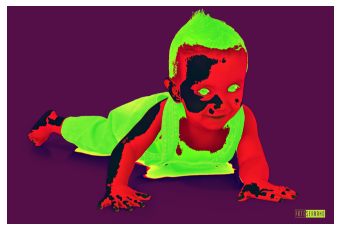

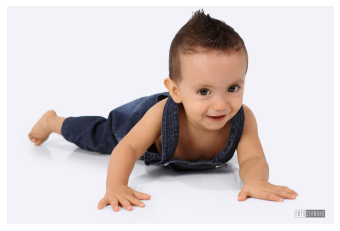

In [12]:
plt.imshow(image_conv)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
# max pool convolution
max_pool = nn.MaxPool2d(2).to(device)
image_pool = max_pool(image_tensor).to(device)
print(image_pool.shape)
image_pool = image_pool.squeeze(0).to(device)
image_pool = image_pool.to('cpu')
image_pool = TF.to_pil_image(image_pool)
print(image_pool.size)

torch.Size([1, 3, 1728, 2592])
(2592, 1728)


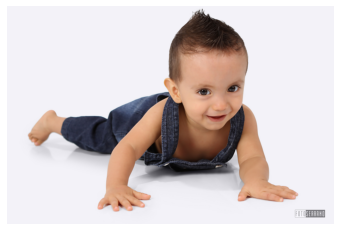

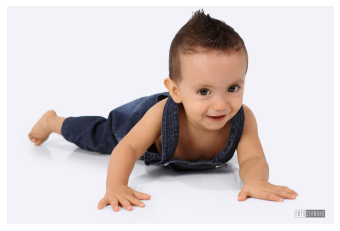

In [14]:
plt.imshow(image_pool)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
image_conv_padding = nn.Conv2d(3, 3, 2, padding=1).to(device)
print(image_tensor.shape)
image_padding = image_conv_padding(image_tensor).to(device)
print(image_padding.shape)
image_padding = image_padding.squeeze(0).to(device)
image_padding = image_padding.to('cpu')
image_padding = TF.to_pil_image(image_padding)
print(image_padding.size)

torch.Size([1, 3, 3456, 5184])
torch.Size([1, 3, 3457, 5185])
(5185, 3457)


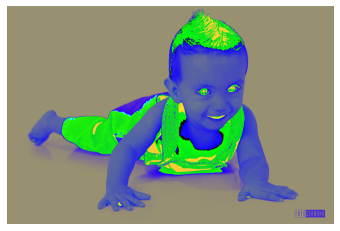

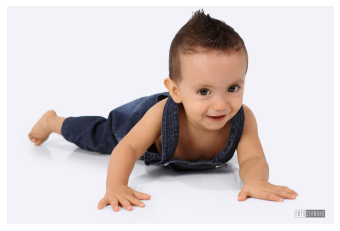

In [16]:
plt.imshow(image_padding)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()